<a href="https://colab.research.google.com/github/profshai/Python-MachineLearning-DeepLearning-Projects/blob/master/Convolutional_Neural_Networks_for_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Networks for Image Classification

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data() #No need to split the data

11493376/11490434 [==============================] - 0s 0us/step


##  Visualizing the Image Data

In [4]:
x_train.shape

(60000, 28, 28)

In [0]:
single_image = x_train[0]

In [6]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [7]:
single_image.shape

(28, 28)

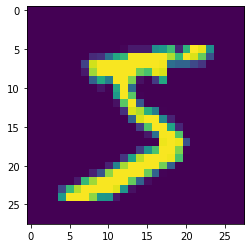

In [8]:
plt.imshow(single_image)

## PreProcessing Data

We first need to make sure the labels will be understandable by our CNN.

### Labels

In [9]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [10]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

Hmmm, looks like our labels are literally categories of numbers. We need to translate this to be "one hot encoded" so our CNN can understand, otherwise it will think this is some sort of regression problem on a continuous axis. Luckily , Keras has an easy to use function for this:

In [0]:
from tensorflow.keras.utils import to_categorical

In [12]:
y_train.shape

(60000,)

In [0]:
y_example = to_categorical(y_train)

In [14]:
y_example

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [15]:
y_example.shape

(60000, 10)

In [16]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [0]:
y_cat_test = to_categorical(y_test,10) #number of classes=10

In [0]:
y_cat_train = to_categorical(y_train,10) 

### Processing X Data

We should normalize the X data

In [19]:
single_image.max()

255

In [20]:
single_image.min()

0

In [0]:
x_train = x_train/255
x_test = x_test/255

In [0]:
scaled_single = x_train[0]

In [23]:
scaled_single.max()

1.0

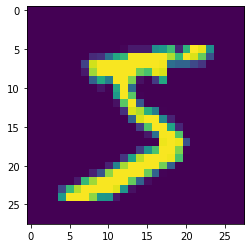

In [24]:
plt.imshow(scaled_single)

### Reshaping the Data

Right now our data is 60,000 images stored in 28 by 28 pixel array formation. 

This is correct for a CNN, but we need to add one more dimension to show we're dealing with 1 RGB channel (since technically the images are in black and white, only showing values from 0-255 on a single channel), a color image would have 3 dimensions.

In [36]:
x_train.shape

(60000, 28, 28, 1)

Reshape to include channel dimension (in this case, 1 channel)

In [0]:
#batch_size, width, height, color_channels
x_train = x_train.reshape(60000, 28, 28, 1)

In [37]:
x_test.shape

(10000, 28, 28, 1)

In [0]:
x_test = x_test.reshape(10000,28,28,1)

In [29]:
x_test.shape

(10000, 28, 28, 1)

## Training the Model

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [0]:
model = Sequential()

# CONVOLUTIONAL LAYER
#with large images, filters will be higher.
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 128 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(128, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax')) #softmax because this is a multi-class model

# https://keras.io/metrics/
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']) # we can add in additional metrics https://keras.io/metrics/

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [0]:
from tensorflow.keras.callbacks import EarlyStopping

In [0]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [35]:
model.fit(x_train,y_cat_train,epochs=10,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.1443 - accuracy: 0.9571 - val_loss: 0.0552 - val_accuracy: 0.9819
Epoch 2/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.0482 - accuracy: 0.9852 - val_loss: 0.0478 - val_accuracy: 0.9845
Epoch 3/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0310 - accuracy: 0.9900 - val_loss: 0.0421 - val_accuracy: 0.9865
Epoch 4/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0212 - accuracy: 0.9929 - val_loss: 0.0452 - val_accuracy: 0.9862
Epoch 5/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.0157 - accuracy: 0.9948 - val_loss: 0.0371 - val_accuracy: 0.9881
Epoch 6/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.0109 - accuracy: 0.9965 - val_loss: 0.0463 - val_accuracy: 0.9880
Epoch 7/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0092 - accuracy: 0.9969 - val_loss: 0.0446 -

## Evaluate the Model

In [39]:
model.metrics_names

['loss', 'accuracy']

In [0]:
losses = pd.DataFrame(model.history.history)

In [41]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,0.144252,0.957150,0.055185,0.9819
1,0.048169,0.985183,0.047793,0.9845
2,0.031048,0.989983,0.042065,0.9865
3,0.021186,0.992900,0.045184,0.9862
4,0.015698,0.994750,0.037053,0.9881


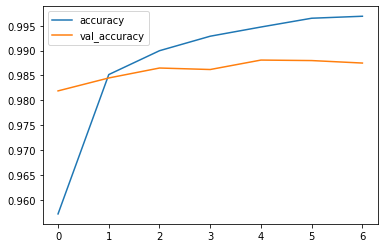

In [42]:
losses[['accuracy','val_accuracy']].plot()

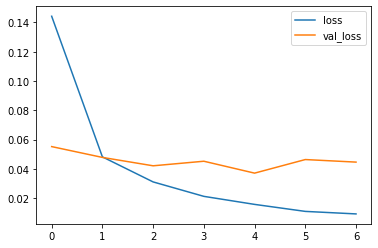

In [43]:
losses[['loss','val_loss']].plot()

In [44]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose=0))

['loss', 'accuracy']
[0.04458245262503624, 0.987500011920929]


In [0]:
from sklearn.metrics import classification_report,confusion_matrix

In [46]:
predictions = model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [48]:
y_cat_test.shape

(10000, 10)

In [49]:
y_cat_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [50]:
predictions[0]

7

In [51]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [52]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.99      0.97      0.98      1032
           3       0.98      0.99      0.98      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       0.98      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.98      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [53]:
confusion_matrix(y_test,predictions)

array([[ 974,    0,    1,    1,    0,    0,    4,    0,    0,    0],
       [   0, 1125,    1,    3,    1,    1,    3,    0,    1,    0],
       [   1,    0, 1005,    8,    1,    0,    4,    6,    7,    0],
       [   0,    0,    0,  999,    0,    7,    1,    0,    2,    1],
       [   0,    0,    0,    0,  974,    0,    2,    0,    0,    6],
       [   1,    0,    0,    5,    0,  884,    1,    0,    1,    0],
       [   1,    1,    0,    0,    1,    2,  952,    0,    1,    0],
       [   0,    1,    4,    2,    0,    0,    0, 1017,    1,    3],
       [   2,    0,    0,    0,    0,    2,    3,    3,  957,    7],
       [   1,    0,    0,    3,    7,    6,    0,    4,    0,  988]])

In [54]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


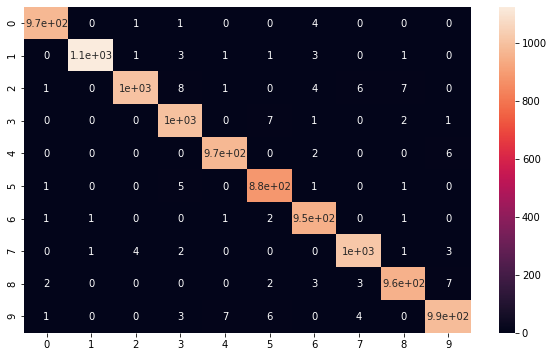

In [55]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)
# https://github.com/matplotlib/matplotlib/issues/14751

## Predicting a given image

In [0]:
my_number = x_test[0]

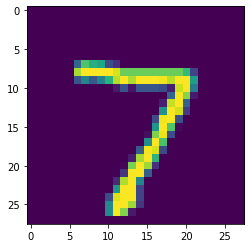

In [57]:
plt.imshow(my_number.reshape(28,28))

In [58]:
# SHAPE --> (num_images,width,height,color_channels)
model.predict_classes(my_number.reshape(1,28,28,1))

array([7])

Looks like the CNN performed quite well!

End of Notebook!